<a href="https://colab.research.google.com/github/ZackMcz/CHALLENGE-01/blob/main/C%C3%B3pia_de_AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    total = df_loja["Preço"].sum()
    total_formatado = f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    faturamentos[f"Loja {i+1:02d}"] = total_formatado

print("FATURAMENTO TOTAL POR LOJA:")
for loja, valor in faturamentos.items():
    print(f"{loja}: {valor}")


FATURAMENTO TOTAL POR LOJA:
Loja 01: R$ 1.534.509,12
Loja 02: R$ 1.488.459,06
Loja 03: R$ 1.464.025,03
Loja 04: R$ 1.384.497,58


# 2. Vendas por Categoria


In [3]:
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}
faturamento_categorias = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    total = df_loja["Preço"].sum()
    total_formatado = f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    faturamentos[f"Loja {i+1:02d}"] = total_formatado

    categorias = df_loja.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
    categorias_formatado = categorias.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    faturamento_categorias[f"Loja {i+1:02d}"] = categorias_formatado

print("\nFATURAMENTO POR CATEGORIA (por loja):")
for loja, categorias in faturamento_categorias.items():
    print(f"\n{loja} (Total: {faturamentos[loja]}):")
    print(categorias)



FATURAMENTO POR CATEGORIA (por loja):

Loja 01 (Total: R$ 1.534.509,12):
Categoria do Produto
eletronicos              R$ 572.659,23
eletrodomesticos         R$ 484.913,36
moveis                   R$ 250.178,11
instrumentos musicais    R$ 121.731,69
esporte e lazer           R$ 52.387,55
brinquedos                R$ 23.993,78
utilidades domesticas     R$ 16.931,48
livros                    R$ 11.713,92
Name: Preço, dtype: object

Loja 02 (Total: R$ 1.488.459,06):
Categoria do Produto
eletronicos              R$ 547.773,71
eletrodomesticos         R$ 464.758,13
moveis                   R$ 235.234,68
instrumentos musicais    R$ 139.987,03
esporte e lazer           R$ 46.326,09
brinquedos                R$ 21.262,21
utilidades domesticas     R$ 19.662,86
livros                    R$ 13.454,35
Name: Preço, dtype: object

Loja 03 (Total: R$ 1.464.025,03):
Categoria do Produto
eletronicos              R$ 547.699,92
eletrodomesticos         R$ 438.984,89
moveis                   R$ 268.095,5

# 3. Média de Avaliação das Lojas

In [4]:
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}
faturamento_categorias = {}
medias_avaliacoes = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    media = df_loja["Avaliação da compra"].mean()
    media_formatada = f"{media:.2f}".replace(".", ",")
    medias_avaliacoes[f"Loja {i+1:02d}"] = media_formatada

print("\nMÉDIA DE AVALIAÇÕES POR LOJA:")
for loja, media in medias_avaliacoes.items():
    print(f"{loja}: {media}")



MÉDIA DE AVALIAÇÕES POR LOJA:
Loja 01: 3,98
Loja 02: 4,04
Loja 03: 4,05
Loja 04: 4,00


# 4. Produtos Mais e Menos Vendidos

In [5]:
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}
faturamento_categorias = {}
medias_avaliacoes = {}
mais_vendidos = {}
menos_vendidos = {}


for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]


    contagem = df_loja["Produto"].value_counts()
    produto_mais_vendido = contagem.idxmax()
    quantidade_mais_vendido = contagem.max()
    mais_vendidos[f"Loja {i+1:02d}"] = (produto_mais_vendido, quantidade_mais_vendido)

    produto_menos_vendido = contagem.idxmin()
    quantidade_menos_vendido = contagem.min()
    menos_vendidos[f"Loja {i+1:02d}"] = (produto_menos_vendido, quantidade_menos_vendido)

print("\nPRODUTO MAIS VENDIDO POR LOJA:")
for loja, (produto, quantidade) in mais_vendidos.items():
    print(f"{loja}: {produto} (Quantidade: {quantidade})")

print("\nPRODUTO MENOS VENDIDO POR LOJA:")
for loja, (produto, quantidade) in menos_vendidos.items():
    print(f"{loja}: {produto} (Quantidade: {quantidade})")



PRODUTO MAIS VENDIDO POR LOJA:
Loja 01: Micro-ondas (Quantidade: 60)
Loja 02: Iniciando em programação (Quantidade: 65)
Loja 03: Kit banquetas (Quantidade: 57)
Loja 04: Cama box (Quantidade: 62)

PRODUTO MENOS VENDIDO POR LOJA:
Loja 01: Headset (Quantidade: 33)
Loja 02: Jogo de tabuleiro (Quantidade: 32)
Loja 03: Blocos de montar (Quantidade: 35)
Loja 04: Guitarra (Quantidade: 33)


# 5. Frete Médio por Loja


In [6]:
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}
medias_frete = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    media_frete = df_loja["Frete"].mean()
    media_frete_formatada = f"R$ {media_frete:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    medias_frete[f"Loja {i+1:02d}"] = media_frete_formatada

print("\nMÉDIA DE FRETE POR LOJA:")
for loja, mediafrete in medias_frete.items():
    print(f"{loja}: {mediafrete}")




MÉDIA DE FRETE POR LOJA:
Loja 01: R$ 34,69
Loja 02: R$ 33,62
Loja 03: R$ 33,07
Loja 04: R$ 31,28


FATURAMENTO TOTAL POR LOJA:
Loja 01: R$ 1.534.509,12
Loja 02: R$ 1.488.459,06
Loja 03: R$ 1.464.025,03
Loja 04: R$ 1.384.497,58


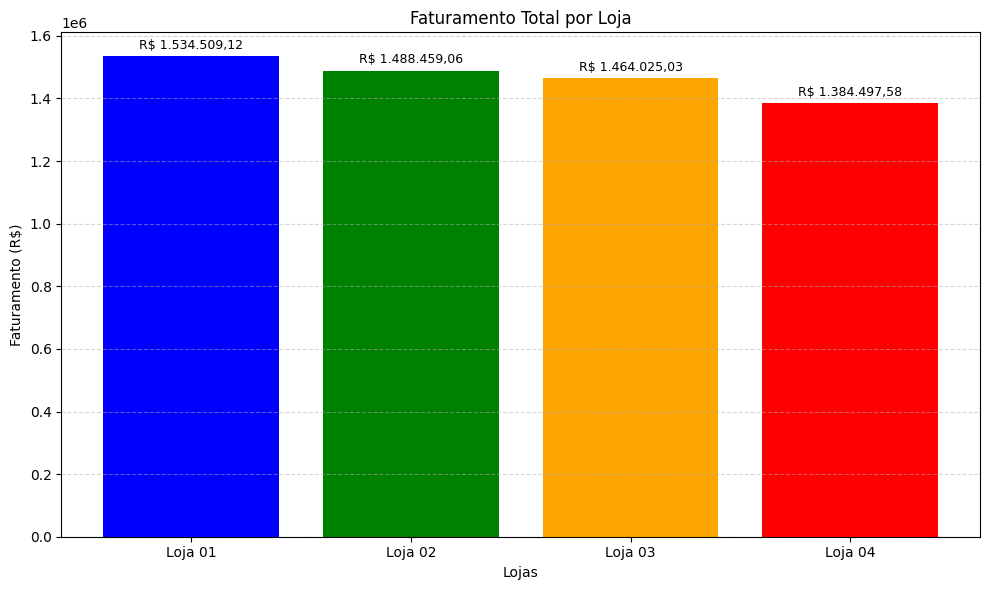

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

urls = [url, url2, url3, url4]

dfs = {}
# Cria um dicionário para armazenar valores numéricos de faturamento
faturamentos_numericos = {}
faturamentos_formatados = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    total = df_loja["Preço"].sum()
    # Armazena o total numérico
    faturamentos_numericos[f"Loja {i+1:02d}"] = total
    # Armazena o total formatado para exibição
    total_formatado = f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    faturamentos_formatados[f"Loja {i+1:02d}"] = total_formatado

print("FATURAMENTO TOTAL POR LOJA:")
for loja, valor in faturamentos_formatados.items():
    print(f"{loja}: {valor}")

# Preparação dos dados para o gráfico
lojas = list(faturamentos_numericos.keys())
# Usa os valores numéricos para plotagem e cálculos
valores_numericos = list(faturamentos_numericos.values())
valores_formatados = list(faturamentos_formatados.values())

# Identificação da menor loja baseada em valores numéricos
indice_menor = valores_numericos.index(min(valores_numericos))

# Definição das cores das barras
cores = ["blue", "green", "orange", "yellow"]
cores[indice_menor] = "red"  # A menor loja fica com a cor vermelha

# Criação do gráfico
plt.figure(figsize=(10, 6))
# Gráfico usando valores numéricos
plt.bar(lojas, valores_numericos, color=cores)
plt.title("Faturamento Total por Loja")
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Adicionar os valores nas colunas
for i, valor_numerico in enumerate(valores_numericos):
    # Usa o valor numérico para posicionar o texto
    # Usa o valor formatado para o conteúdo do texto
    plt.text(i, valor_numerico + max(valores_numericos)*0.01, valores_formatados[i],
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

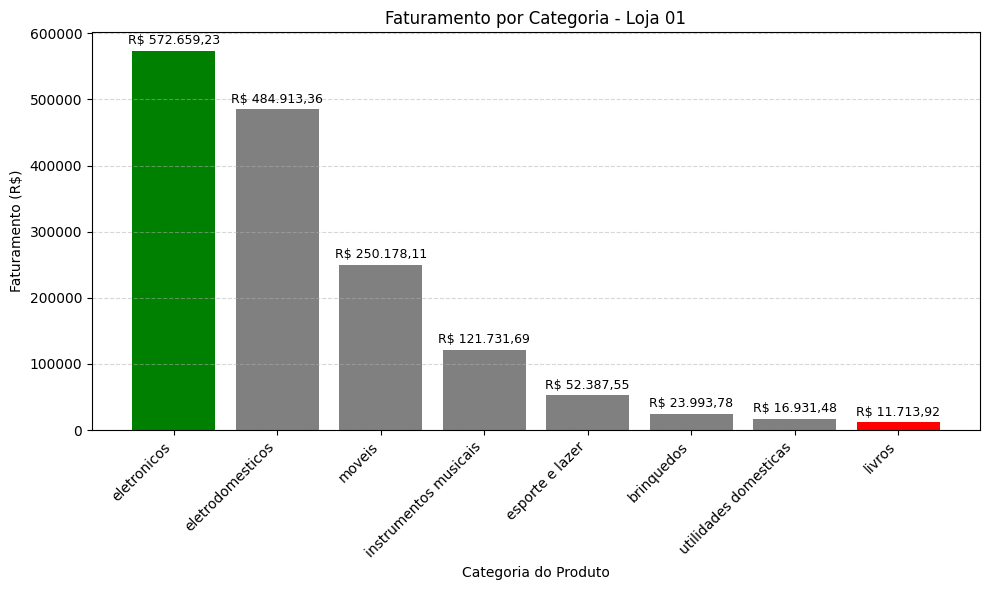

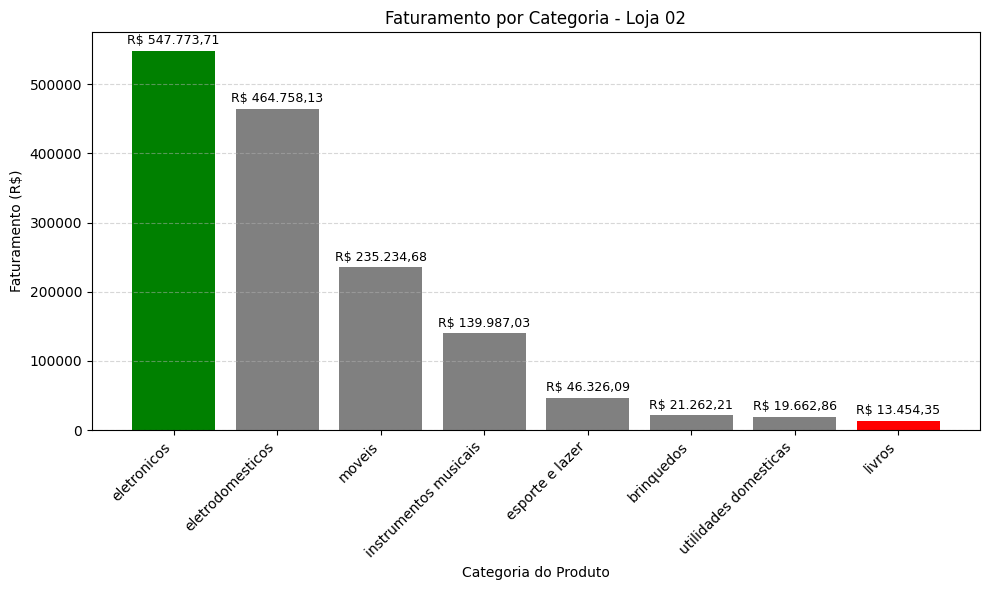

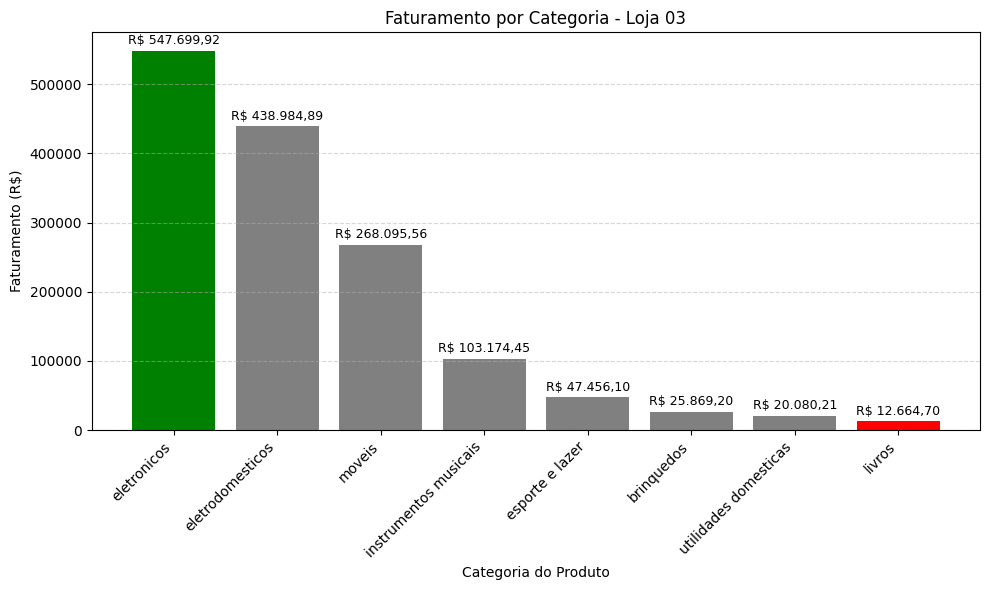

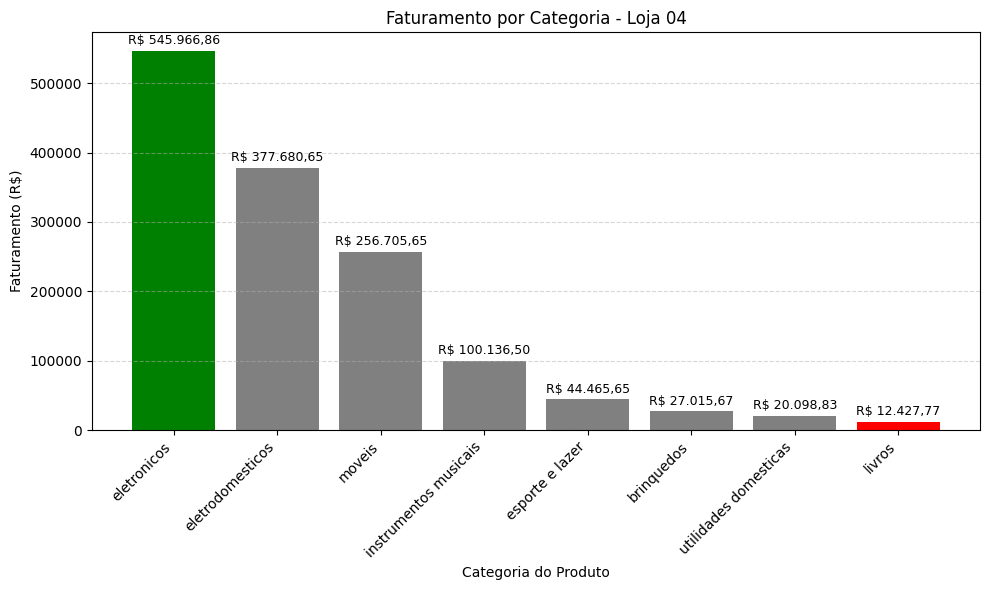

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

urls = [url, url2, url3, url4]

dfs = {}
faturamentos = {}
# Store numerical category sums and formatted category sums separately
faturamento_categorias_numerico = {}
faturamento_categorias_formatado = {}

for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    total = df_loja["Preço"].sum()
    total_formatado = f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    faturamentos[f"Loja {i+1:02d}"] = total_formatado

    # Calculate numerical category sums
    categorias_numerico = df_loja.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)
    faturamento_categorias_numerico[f"Loja {i+1:02d}"] = categorias_numerico

    # Calculate and store formatted category sums (for potential display in text)
    categorias_formatado = categorias_numerico.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    faturamento_categorias_formatado[f"Loja {i+1:02d}"] = categorias_formatado


# Geração dos gráficos de barras para cada loja (categorias)
import matplotlib.pyplot as plt

for loja, categorias in faturamento_categorias_numerico.items():
    categorias_ordenadas = categorias.sort_values(ascending=False)
    categorias_nomes = categorias_ordenadas.index.tolist()
    categorias_valores = categorias_ordenadas.values

    # Definição de cores
    cores = ["gray"] * len(categorias_valores)
    cores[0] = "green"  # Maior faturamento
    cores[-1] = "red"   # Menor faturamento

    # Criação do gráfico
    plt.figure(figsize=(10, 6))
    plt.bar(categorias_nomes, categorias_valores, color=cores)
    plt.title(f"Faturamento por Categoria - {loja}")
    plt.xlabel("Categoria do Produto")
    plt.ylabel("Faturamento (R$)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Inserção dos valores formatados acima das barras
    valores_formatados = faturamento_categorias_formatado[loja].values
    for i, valor in enumerate(categorias_valores):
        plt.text(i, valor + max(categorias_valores)*0.01, valores_formatados[i],
                 ha='center', va='bottom', fontsize=9)

    plt.show()


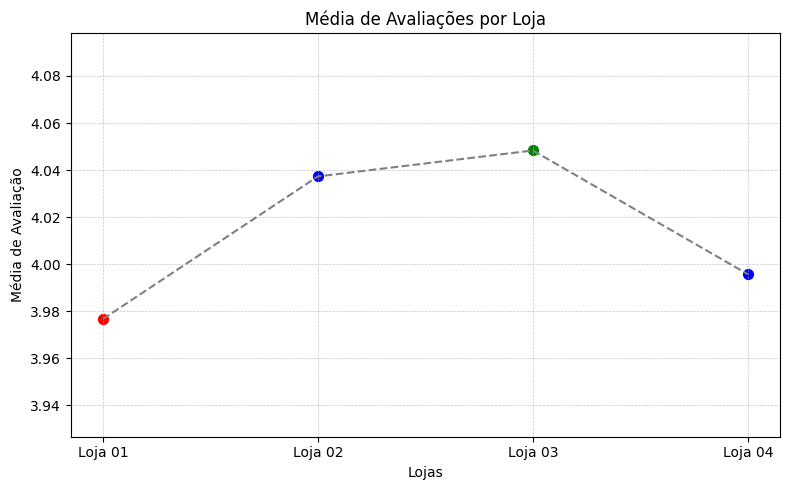

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV
urls = [url, url2, url3, url4]

dfs = {}
medias_avaliacoes = {}

# Leitura dos arquivos e cálculo das médias
for i, endereco in enumerate(urls):
    nome_df = f"df" if i == 0 else f"df{i+1}"
    dfs[nome_df] = pd.read_csv(endereco)
    df_loja = dfs[nome_df]

    media = df_loja["Avaliação da compra"].mean()
    medias_avaliacoes[f"Loja {i+1:02d}"] = media

# Preparação dos dados
lojas = list(medias_avaliacoes.keys())
valores_medias = list(medias_avaliacoes.values())

# Identificação de menor e maior média para definição de cores
min_media = min(valores_medias)
max_media = max(valores_medias)

cores = []
for media in valores_medias:
    if media == min_media:
        cores.append("red")
    elif media == max_media:
        cores.append("green")
    else:
        cores.append("blue")

# Geração do gráfico
plt.figure(figsize=(8, 5))

# Conectar pontos com linha tracejada cinza
plt.plot(lojas, valores_medias, linestyle='--', color='gray')

# Plotar cada ponto individualmente com cor adequada
for i in range(len(lojas)):
    plt.scatter(lojas[i], valores_medias[i], color=cores[i], s=50)  # s define o tamanho do marcador

# Configurações
plt.title("Média de Avaliações por Loja")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.ylim(min(valores_medias)-0.05, max(valores_medias)+0.05)  # Zoom próximo aos dados
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # grade discreta

plt.tight_layout()
plt.show()